In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv


In [36]:
# read dataset and check first 5 rows
df=pd.read_csv('../input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [37]:
# check missing value for all the columns: no missing values in any columns except default column  
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [38]:
# describe dataset with all the values
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [39]:
# withdraw all the null value from default column and run check null value again to check 
df= df.dropna()

<Axes: xlabel='age', ylabel='income'>

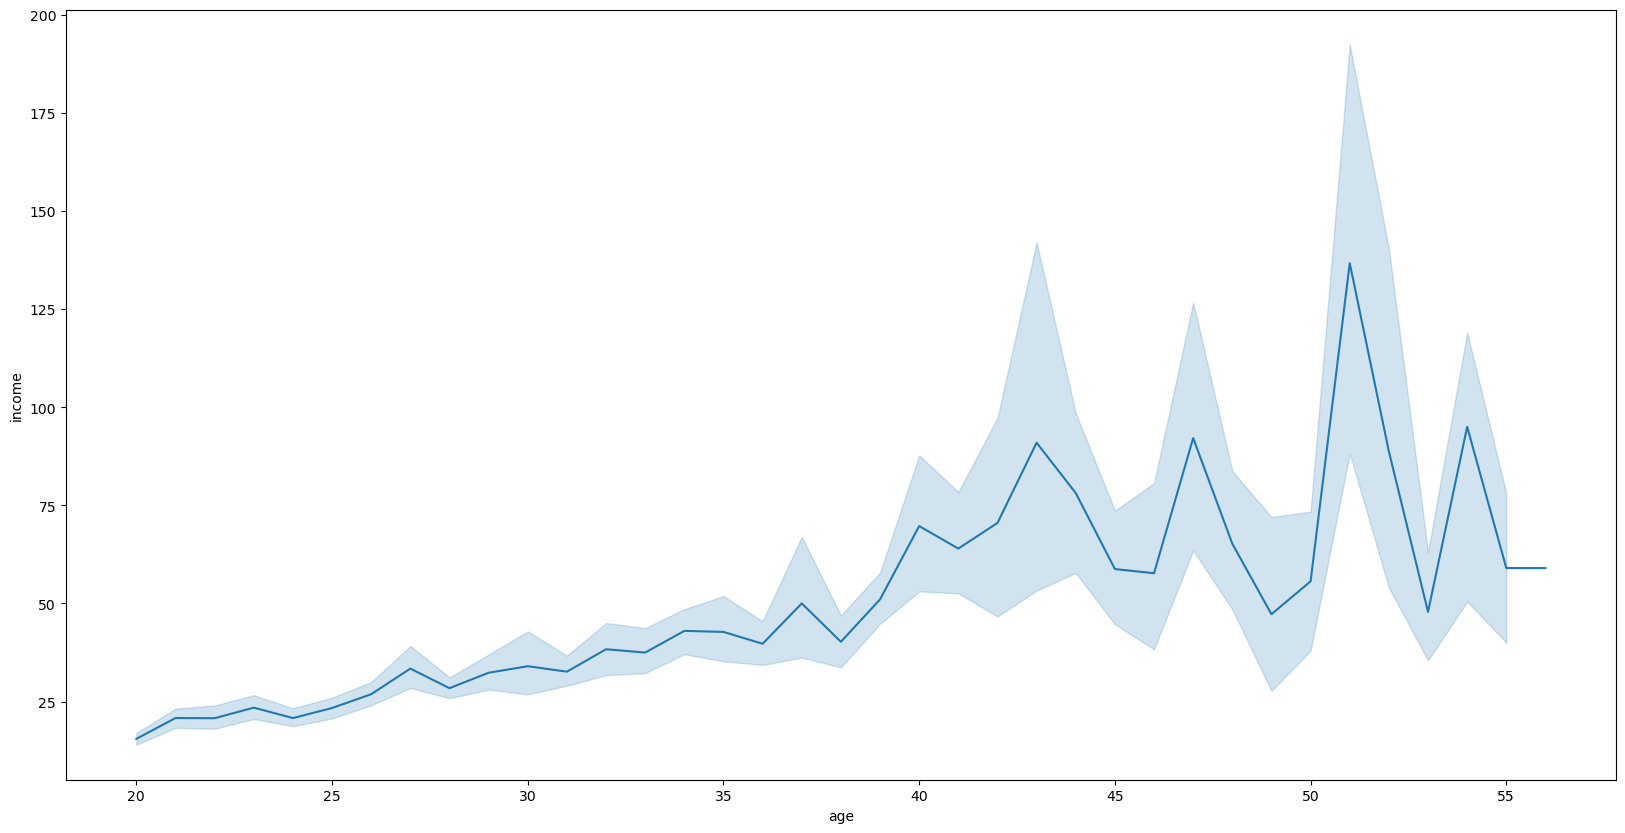

In [40]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x= 'age', y='income', data=df, ax=ax)

Analysis: Age and Income has a relatively positive relationship, that is being said increasing age will lead to increasing income, which is especially obvious until 40 years old. After 40 years old, the increasing trend will be fluctuating. 

<Axes: xlabel='age', ylabel='debtinc'>

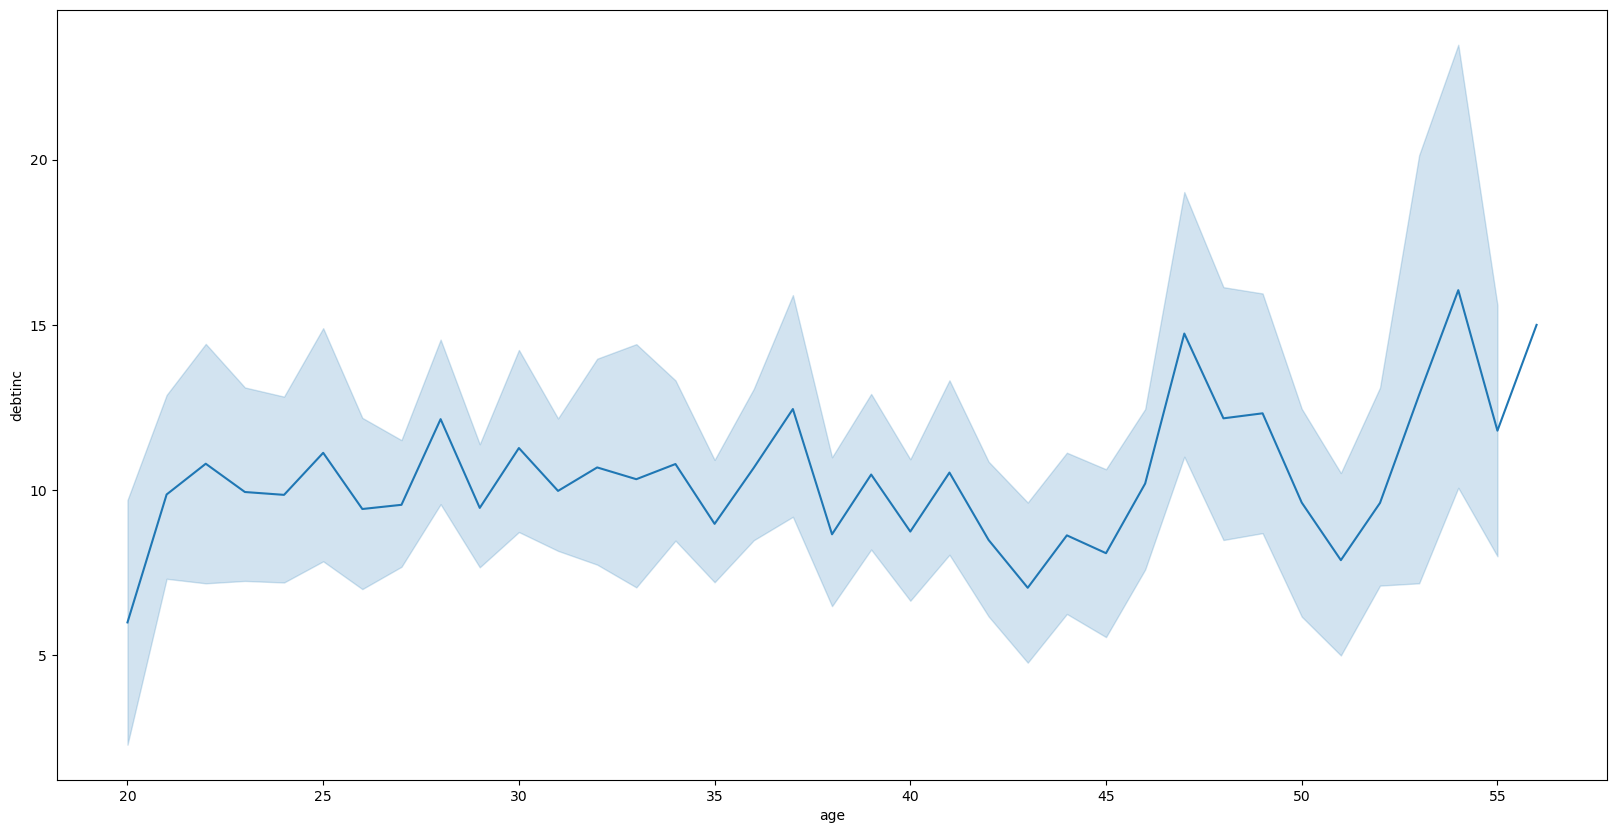

In [41]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x= 'age', y='debtinc', data=df, ax=ax)

Analysis: The plot shows a relative same debt/income ratio to all the age group.There is no observed obvious increase/decrease trend for a specific age group.

In [42]:
# check the default column variable 
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

Analysis: we have 517 customer who never defaulted, while there are 183 customer who is defaulted before.

In [43]:
# prep for split the dataset by dropping the 'default' column 
x= df.drop(['default'], axis=1) # x data will everything except the default column 
y= df['default'] # y data will be only the default column


In [44]:
# split the data into training and tesing 
# random_state number will ensure the train_test split a normal distribution random distribution (random sate of around 40 and 50 works best for all the models )
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [45]:
# for the nature of the data (some are high digit, some are low decimals, so we need to scale the data)
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform (xtest)


# # **Build Machine Learning Model**

Random Forest Model 

In [48]:
# initialize the random forest model 
rfc = RandomForestClassifier(n_estimators= 200)

In [50]:
# fir the random forest model 
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [51]:
rfc.score(xtest,ytest)

0.7928571428571428